In [8]:
import rasterio
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import FancyArrowPatch, ConnectionPatch
from matplotlib.ticker import MaxNLocator, FuncFormatter
import matplotlib.gridspec as gridspec

import seaborn as sns

from rasterio.plot import show
from rasterio.merge import merge

from pathlib import Path
import os
import sys

# Get the parent directory of the current file
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the parent directory to sys.path
sys.path.append(parent_dir)
# Import functions from functions.py
from functions import height_to_slopes, slopes_to_height
from WFC import WaveFunctionCollapse

plt.rcParams["font.family"] = "Times New Roman"


In [2]:
wfc = WaveFunctionCollapse(np.zeros((1,1,1)), (2,2,2))
wfc.load("../results/run_multi_input/N26E057/wfc_state")

In [106]:
pattern_ch = -1

In [121]:
pattern_ch

-10

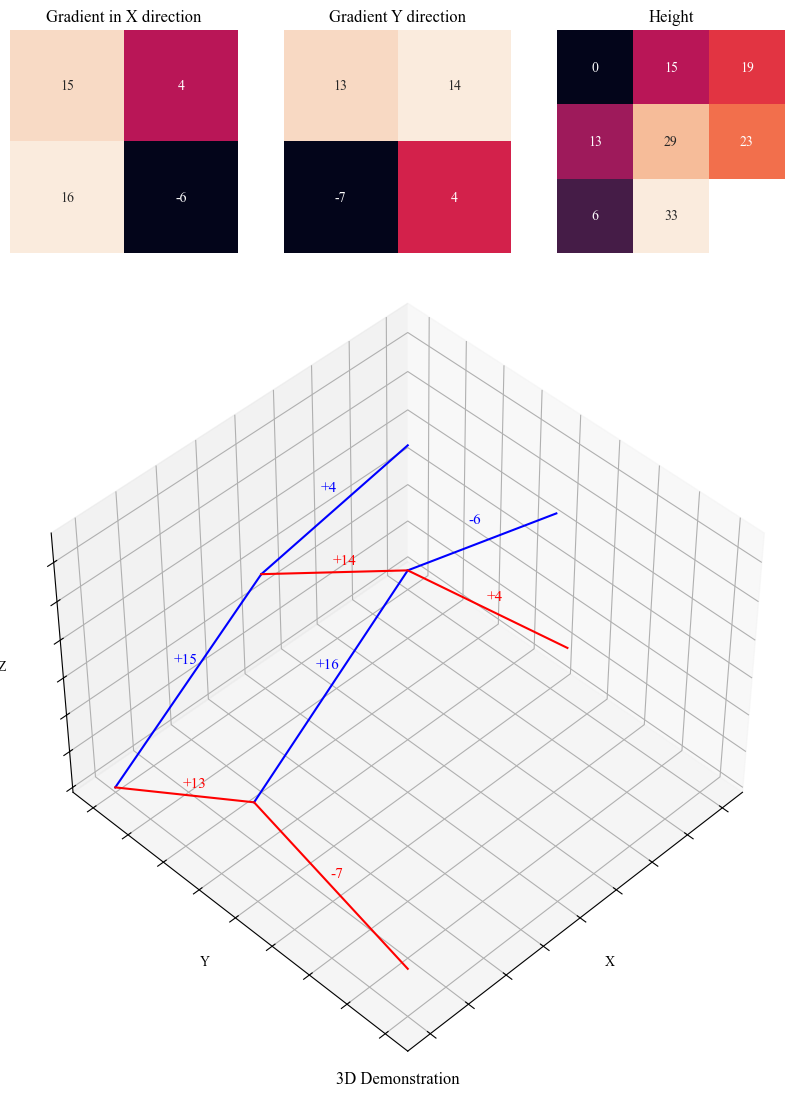

In [130]:
pattern_ch += -1
patterns = wfc.patterns[pattern_ch:pattern_ch+1]



# Create a 3x4 grid using GridSpec
fig = plt.figure(figsize=(10, 4*10/3))
gs = fig.add_gridspec(4*len(patterns), 3)

for i, pat in enumerate(patterns):
    pat_array = np.reshape(pat, (wfc.pattern_size))
    grad_x = pat_array[..., 0]
    grad_y = pat_array[..., 1]
    Z = slopes_to_height(grad_x, grad_y, pad=1)
    mask = Z == -32767
    
    # Heatmaps
    ax_grad_x = fig.add_subplot(gs[0, i*3])
    ax_grad_y = fig.add_subplot(gs[0, i*3+1])
    ax_height = fig.add_subplot(gs[0, i*3+2])
    ax_3d = fig.add_subplot(gs[1:, i*3:i*3+3], projection='3d')
    
    for ax in [ax_grad_x, ax_grad_y, ax_height]:
        ax.set_axis_off()
    
    ax_grad_x.set_title("Gradient in X direction")
    ax_grad_y.set_title("Gradient Y direction")
    ax_height.set_title("Height")
    
    sns.heatmap(grad_x, annot=True, ax=ax_grad_x, cbar=None)
    sns.heatmap(grad_y, annot=True, ax=ax_grad_y, cbar=None)
    sns.heatmap(Z, annot=True, ax=ax_height, mask=mask, cbar=None)

    # 3D Plot
    
    X, Y = np.meshgrid(np.arange(Z.shape[1]), np.arange(Z.shape[0]))
    
    for x in range(Z.shape[1]-1):
        for y in range(Z.shape[0]-1):
            if mask[y, x]:
                continue
            
            # Line from (x, y) to (x+1, y)
            if x + 1 < Z.shape[1]:  # Ensure we're within bounds
                ax_3d.plot([-x, -x - 1], [y, y], [Z[y, x], Z[y, x+1]], color='blue')
                text = f"{int(grad_x[y, x])}"
                if grad_x[y,x] > 0:
                    text = '+' + text
                ax_3d.text(-x - 0.5, y - 0.1 , (Z[y, x] + Z[y, x+1]) / 2 + 1, text, color='blue', fontsize=11)
            
            # Line from (x, y) to (x, y+1)
            if y + 1 < Z.shape[0]:  # Ensure we're within bounds
                ax_3d.plot([-x, -x], [y, y + 1], [Z[y, x], Z[y+1, x]], color='red')
                text = f"{int(grad_y[y, x])}"
                if grad_y[y,x] > 0:
                    text = '+' + text
                ax_3d.text(-x, y + 0.5,(Z[y, x] + Z[y + 1, x]) / 2 + 1, text, color='red', fontsize=11)
    
    ax_3d.view_init(azim=45, elev=45)
    ax_3d.set_xlabel('X')
    ax_3d.set_ylabel('Y')
    ax_3d.set_zlabel('Z')
    ax_3d.set_xticklabels([])
    ax_3d.set_yticklabels([])
    ax_3d.set_zticklabels([])
    ax_3d.set_title("3D Demonstration", y=-0.05)
    
    
    



In [ ]:
pattern_ch = 10

10

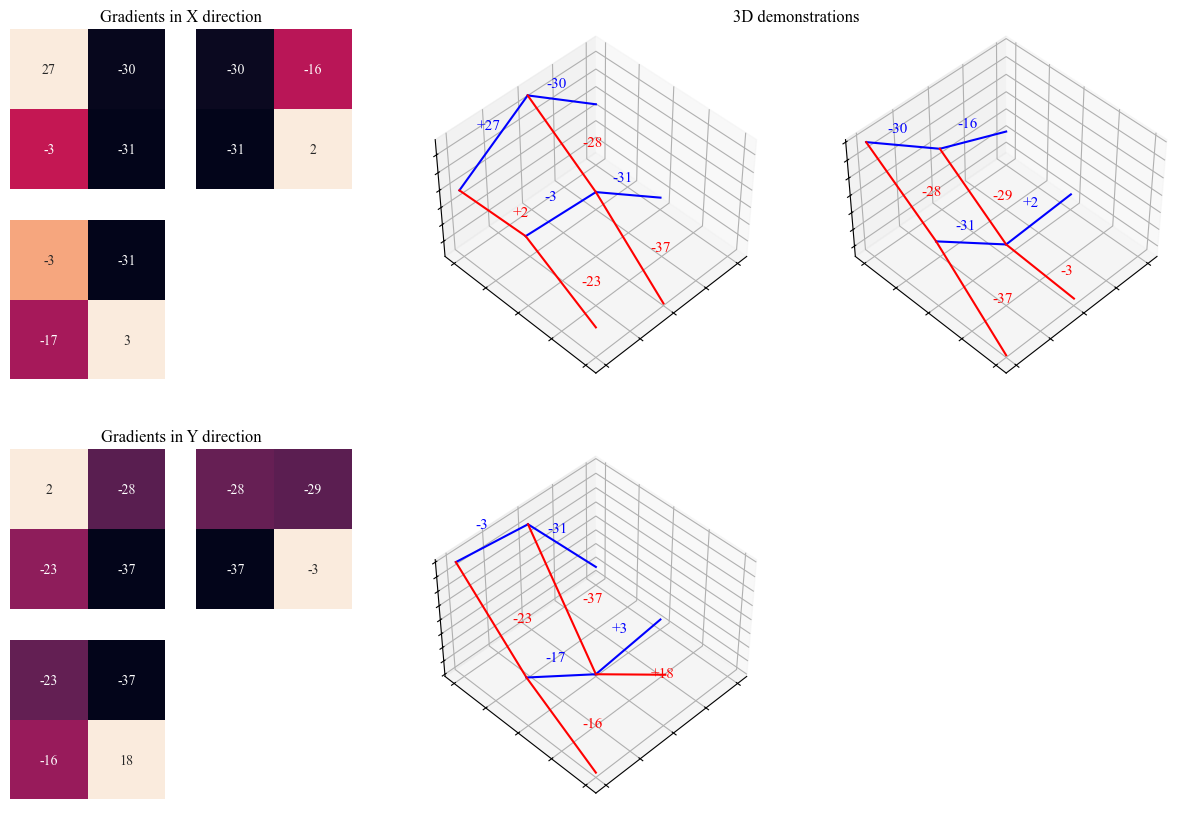

In [104]:
"""
0 1 8 8 9 9
2 3 8 8 9 9 
4 5 10 10 11 11
6 7 10 10 11 11
"""

pat = wfc.number_to_pattern[pattern_ch]
adj = wfc.adjacency_rules[pat]
pat_right = next(iter(adj['right']))
pat_bottom = next(iter(adj["below"]))

pats = [pat, pat_right, pat_bottom]
adj


fig = plt.figure(figsize=(15, 10))

gs = gridspec.GridSpec(2, 3, figure=fig)

gs_x = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[0,0])
gs_y = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[1,0])
gs_3d = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[:,1:])

ax_title = fig.add_subplot(gs[0,0])
ax_title.set_axis_off()
ax_title.set_title("Gradients in X direction")

ax_title = fig.add_subplot(gs[1,0])
ax_title.set_axis_off()
ax_title.set_title("Gradients in Y direction")

ax_title = fig.add_subplot(gs[:,1:])
ax_title.set_axis_off()
ax_title.set_title("3D demonstrations")

pos = [
    (0,0),
    (0,1),
    (1,0)]

for i, p in enumerate(pats):

    ax_x = fig.add_subplot(gs_x[pos[i]])
    ax_y = fig.add_subplot(gs_y[pos[i]])
    ax_3d = fig.add_subplot(gs_3d[pos[i]], projection='3d')
    
        
    for ax in [ax_x, ax_y]:
        ax.set_axis_off()
    
    pat_array = np.reshape(p, (wfc.pattern_size))
    grad_x = pat_array[..., 0]
    grad_y = pat_array[..., 1]
    Z = slopes_to_height(grad_x, grad_y, pad=1)
    mask = Z == -32767
    
    sns.heatmap(grad_x, annot=True, ax=ax_x, cbar=None)
    sns.heatmap(grad_y, annot=True, ax=ax_y, cbar=None)
        # 3D Plot
    
    for x in range(Z.shape[1]-1):
        for y in range(Z.shape[0]-1):
            if mask[y, x]:
                continue
            
            # Line from (x, y) to (x+1, y)
            if x + 1 < Z.shape[1]:  # Ensure we're within bounds
                ax_3d.plot([-x, -x - 1], [y, y], [Z[y, x], Z[y, x+1]], color='blue')
                text = f"{int(grad_x[y, x])}"
                if grad_x[y,x] > 0:
                    text = '+' + text
                ax_3d.text(-x - 0.5, y - 0.25  , (Z[y, x] + Z[y, x+1]) / 2 + 1, text, color='blue', fontsize=11)
            
            # Line from (x, y) to (x, y+1)
            if y + 1 < Z.shape[0]:  # Ensure we're within bounds
                ax_3d.plot([-x, -x], [y, y + 1], [Z[y, x], Z[y+1, x]], color='red')
                text = f"{int(grad_y[y, x])}"
                if grad_y[y,x] > 0:
                    text = '+' + text
                ax_3d.text(-x - 0.1, y + 0.7,(Z[y, x] + Z[y + 1, x]) / 2 + 1, text, color='red', fontsize=11)
    
    ax_3d.view_init(azim=45, elev=45)
    
    ax_3d.set_xticklabels([])
    ax_3d.set_yticklabels([])
    ax_3d.set_zticklabels([])


    pattern_ch += 1


In [11]:
a = np.arange(16).reshape((2,8))
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15]])

In [12]:
b = (1,4)
a[b]

12